In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.ticker as ticker

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Carregar arquivos e merge

In [4]:
os.chdir("/content/gdrive/My Drive/Pesquisa/1 Artigos em desenvolvimento/2025_11_swc_heatwave_detection_vs_NBR15575/1 Desenvolvimento/data")
filelist = os.listdir()

In [5]:
filelist

['833780_MY.2008.epw',
 '833780_MY.2007.epw',
 '833780_MY.1999.epw',
 '833780_MY.2002.epw',
 '833780_MY.2011.epw',
 '833780_MY.2003.epw',
 '833780_MY.1996.epw',
 '833780_MY.2013.epw',
 '833780_MY.1991.epw',
 '833780_MY.1994.epw',
 '833780_MY.2005.epw',
 '833780_MY.1997.epw',
 '833780_MY.2010.epw',
 '833780_MY.2015.epw',
 '833780_MY.1995.epw',
 '833780_MY.2000.epw',
 '833780_MY.2006.epw',
 '833780_MY.2009.epw',
 '833780_MY.2001.epw',
 '833780_MY.2004.epw',
 '833780_MY.2012.epw',
 '833780_MY.1993.epw',
 '833780_MY.1998.epw',
 '833780_MY.1992.epw',
 '833780_MY.2014.epw',
 '833780_MY.2019.epw',
 '833780_MY.2022.epw',
 '833780_MY.2016.epw',
 '833780_MY.2021.epw',
 '833780_MY.2017.epw',
 '833780_MY.2018.epw',
 '833780_MY.2023.epw',
 '833780_MY.2020.epw',
 'daily_max.csv',
 'all_MYs_heatwaves_inmet.csv',
 'all_MYs_heatwaves_ouzeau.csv',
 'merged_heatwaves.csv']

In [ ]:
df_inmet = pd.read_csv('all_MYs_heatwaves_inmet.csv', parse_dates=['timeset'])

<ipython-input-6-d15f7d77ee5c>:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inmet = pd.read_csv('all_MYs_heatwaves_inmet.csv', parse_dates=['timeset'])


In [ ]:
df_ouzeau = pd.read_csv('all_MYs_heatwaves_ouzeau.csv', parse_dates=['timeset'])

In [ ]:
df_inmet.rename(columns={'heat_wave_alert': 'heatwave_alert_inmet'}, inplace=True)

In [ ]:
df_ouzeau.rename(columns={'is_heatwave': 'is_heatwave_ouzeau', 'heatwave_event': 'heatwave_event_ouzeau'}, inplace=True)

In [ ]:
cols_common = [col for col in df_inmet.columns if col not in ['heatwave_alert_inmet']]

In [ ]:
df_common = df_inmet[cols_common].copy()

In [ ]:
df_det_inmet = df_inmet[['timeset', 'heatwave_alert_inmet']].copy()

In [ ]:
df_det_ouzeau = df_ouzeau[['timeset', 'is_heatwave_ouzeau', 'heatwave_event_ouzeau']].copy()

In [ ]:
df_detection = pd.merge(df_det_inmet, df_det_ouzeau, on='timeset', how='outer')

In [ ]:
merged_df = pd.merge(df_common, df_detection, on='timeset', how='left')

In [ ]:
# Dicionário de mapeamento conforme a lista fornecida
renomeacoes = {
    "0": "Year",
    "1": "Month",
    "2": "Day",
    "3": "Hour",
    "4": "Minute",
    "5": "Data Source and Uncertainty Flags",
    "6": "Dry Bulb Temperature",          # Temperatura do Ar (°C)
    "7": "Dew Point Temperature",          # Temperatura do Ponto de Orvalho (°C)
    "8": "Relative Humidity",              # Umidade Relativa
    "9": "Atmospheric Station Pressure",   # Pressão Atmosférica da Estação (Pa)
    "10": "Extraterrestrial Horizontal Radiation",  # Radiação Extraterrestre Horizontal (Wh/m2)
    "11": "Extraterrestrial Direct Normal Radiation", # Radiação Extraterrestre Direta Normal (Wh/m2)
    "12": "Horizontal Infrared Radiation Intensity", # Intensidade da Radiação Infravermelha Horizontal (Wh/m2)
    "13": "Global Horizontal Radiation",   # Radiação Global Horizontal (Wh/m2)
    "14": "Direct Normal Radiation",         # Radiação Direta Normal (Wh/m2)
    "15": "Diffuse Horizontal Radiation",   # Radiação Difusa Horizontal (Wh/m2)
    "16": "Global Horizontal Illuminance",  # Iluminância Global Horizontal (lux)
    "17": "Direct Normal Illuminance",      # Iluminância Direta Normal (lux)
    "18": "Diffuse Horizontal Illuminance", # Iluminância Difusa Horizontal (lux)
    "19": "Zenith Luminance",               # Luminância Zenith (Cd/m2)
    "20": "Wind Direction",                 # Direção do Vento (graus)
    "21": "Wind Speed",                     # Velocidade do Vento (m/s)
    "22": "Total Sky Cover",                # Cobertura Total do Céu
    "23": "Opaque Sky Cover",               # Cobertura Opaca do Céu (usada se Horizontal IR Intensity estiver ausente)
    "24": "Visibility",                     # Visibilidade (km)
    "25": "Ceiling Height",                 # Altura do Teto (m)
    "26": "Present Weather Observation",    # Observação do Tempo Atual
    "27": "Present Weather Codes",          # Códigos do Tempo Atual
    "28": "Precipitable Water",             # Água Precipitável (mm)
    "29": "Aerosol Optical Depth",          # Profundidade Óptica dos Aerossóis (milésimos)
    "30": "Snow Depth",                     # Profundidade de Neve (cm)
    "31": "Days Since Last Snowfall",       # Dias desde a Última Queda de Neve
    "32": "Albedo",                         # Albedo
    "33": "Liquid Precipitation Depth",     # Profundidade de Precipitação Líquida (mm)
    "34": "Liquid Precipitation Quantity"    # Quantidade de Precipitação Líquida (hr)
}

# Renomeia as colunas conforme o dicionário
merged_df.rename(columns=renomeacoes, inplace=True)

# Exibe as primeiras linhas para verificar o resultado
print(merged_df.head())

   Year  Month  Day  Hour  Minute  \
0  1991      1    1     1       0   
1  1991      1    1     2       0   
2  1991      1    1     3       0   
3  1991      1    1     4       0   
4  1991      1    1     5       0   

                   Data Source and Uncertainty Flags  Dry Bulb Temperature  \
0  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...                  19.2   
1  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...                  19.0   
2  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...                  19.0   
3  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...                  18.8   
4  ?9?9?9?9E0?9?9?9*9*9?9?9?9?9?9?9*9?9*9*9?9*9?9...                  18.4   

   Dew Point Temperature  Relative Humidity  Atmospheric Station Pressure  \
0                   16.8                 86                         89311   
1                   17.0                 88                         89635   
2                   17.0                 88                         89635   


In [ ]:
merged_df.rename(columns={ "heatwave_alert_inmet": "INMET Alert", "is_heatwave_ouzeau": "Ouzeau Detected", "heatwave_event_ouzeau": "Ouzeau Event ID" }, inplace=True)

In [ ]:
merged_df.to_csv('merged_heatwaves.csv', index=False)

# Análises

In [5]:
df = pd.read_csv('merged_heatwaves.csv')

<ipython-input-5-66cd482c7ce2>:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_heatwaves.csv')


In [6]:
df['timeset'] = pd.to_datetime(df['timeset'])

In [7]:
df.set_index('timeset', inplace=True)

In [8]:
# Para INMET: qualquer valor não-Nan na coluna "INMET Alert" indica detecção
df['inmet_detected'] = (~df['INMET Alert'].isna()).astype(int)

In [9]:
df['inmet_detected']

,inmet_detected
timeset,
1991-01-01 01:00:00,0
1991-01-01 02:00:00,0
1991-01-01 03:00:00,0
1991-01-01 04:00:00,0
1991-01-01 05:00:00,0
...,...
2023-12-31 20:00:00,0
2023-12-31 21:00:00,0
2023-12-31 22:00:00,0


In [10]:
# Para Ouzeau: converte "Ouzeau Detected" (assumindo que é booleano) para 0 (False) ou 1 (True)
df['ouzeau_detected'] = df['Ouzeau Detected'].astype(int)


In [11]:
# 3. Cálculo da Matriz de Contingência e Taxa de Concordância
crosstab = pd.crosstab(df['inmet_detected'], df['ouzeau_detected'],
                       rownames=['INMET'], colnames=['Ouzeau'])
print("Matriz de Contingência (Número de Registros):")
print(crosstab)

Matriz de Contingência (Número de Registros):
Ouzeau       0     1
INMET               
0       284256  3408
1          624   984


In [12]:
# Taxa de concordância geral (percentual de registros em que os métodos concordam)
overall_agreement = (df['inmet_detected'] == df['ouzeau_detected']).mean() * 100
print("\nTaxa de concordância geral: {:.2f}%".format(overall_agreement))


Taxa de concordância geral: 98.61%


In [13]:
# Concordância apenas para registros onde pelo menos um método detectou uma onda de calor
subset = df[(df['inmet_detected'] == 1) | (df['ouzeau_detected'] == 1)]
if len(subset) > 0:
    agreement_detected = (subset['inmet_detected'] == subset['ouzeau_detected']).mean() * 100
    print("Taxa de concordância (casos com detecção): {:.2f}%".format(agreement_detected))
else:
    print("Nenhum registro com detecção em pelo menos um método.")

Taxa de concordância (casos com detecção): 19.62%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


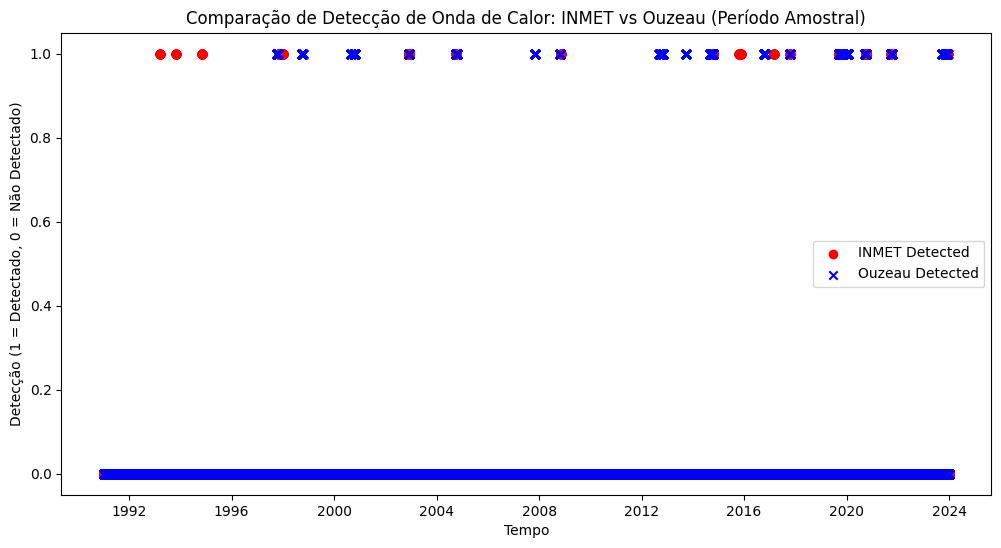

In [14]:
# 4. Análise Gráfica: Visualização comparativa dos métodos em um período amostral
sample_period = df['1961-01-01':'2024-01-01']  # ajuste as datas conforme necessário

plt.figure(figsize=(12, 6))
# Registros onde INMET detectou (1)
plt.scatter(sample_period.index, sample_period['inmet_detected'], color='red', label='INMET Detected', marker='o')
# Registros onde Ouzeau detectou (1)
plt.scatter(sample_period.index, sample_period['ouzeau_detected'], color='blue', label='Ouzeau Detected', marker='x')

plt.ylabel('Detecção (1 = Detectado, 0 = Não Detectado)')
plt.xlabel('Tempo')
plt.title('Comparação de Detecção de Onda de Calor: INMET vs Ouzeau (Período Amostral)')
plt.legend()
plt.show()

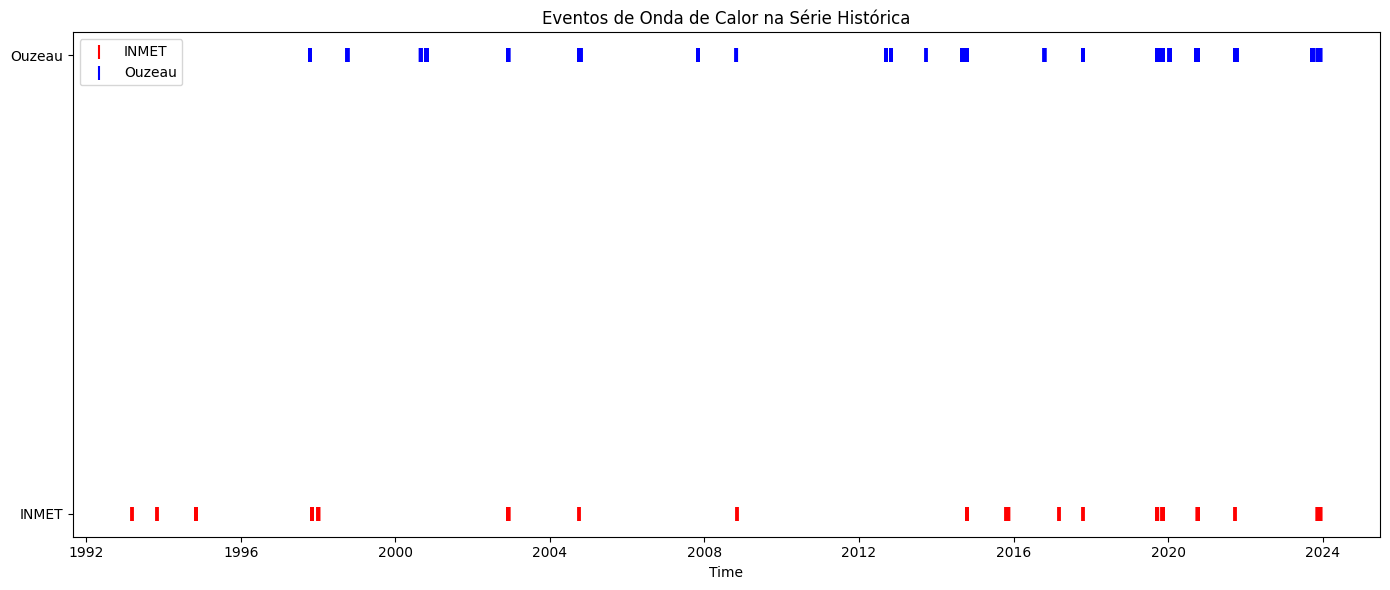

In [15]:
# Extraindo os tempos em que cada método detectou um evento
inmet_events = df.index[df['inmet_detected'] == 1]
ouzeau_events = df.index[df['ouzeau_detected'] == 1]

# Plot usando scatter para facilitar a legenda
plt.figure(figsize=(14, 6))
plt.scatter(inmet_events, [1]*len(inmet_events), color='red', marker='|', s=100, label='INMET')
plt.scatter(ouzeau_events, [2]*len(ouzeau_events), color='blue', marker='|', s=100, label='Ouzeau')

plt.yticks([1, 2], ['INMET', 'Ouzeau'])
plt.xlabel('Time')
plt.title('Eventos de Onda de Calor na Série Histórica')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# Definição das cores conforme o nível de alerta do INMET
color_mapping = {
    "Yellow": "gold",
    "Orange": "orange",
    "Red": "red"
}

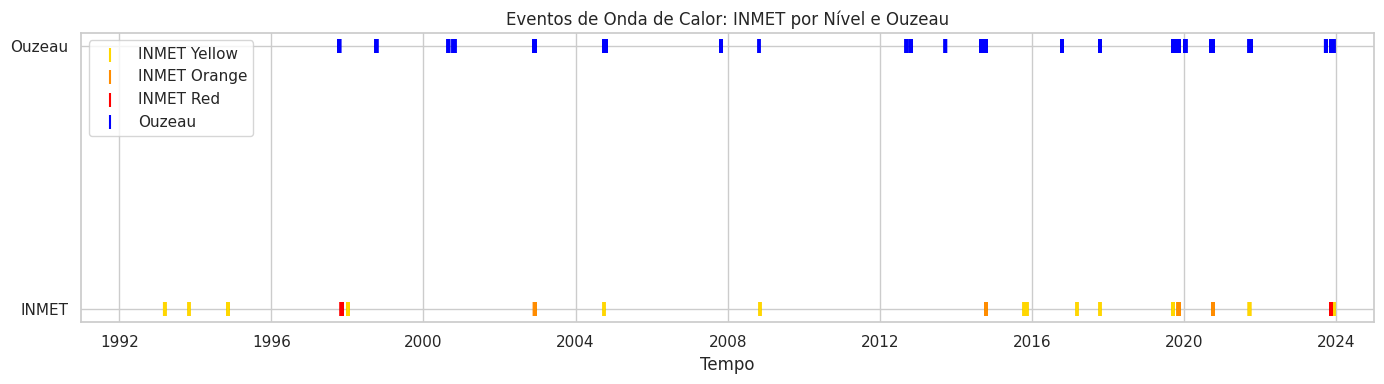

In [21]:
# Filtra a série para o período desejado
df = df.loc['1960-01-01':'2024-12-31']

plt.figure(figsize=(14, 4))

# Plot dos eventos do INMET agrupados por nível de alerta
for level, color in color_mapping.items():
    # Seleciona os instantes em que o alerta é exatamente aquele nível
    event_times = df.index[df['INMET Alert'] == level]
    plt.scatter(event_times, [1] * len(event_times), color=color, marker='|', s=100,
                label=f'INMET {level}')

# Plot dos eventos do método Ouzeau (cor azul, posicionados em y=2)
ouzeau_event_times = df.index[df['ouzeau_detected'] == 1]
plt.scatter(ouzeau_event_times, [2] * len(ouzeau_event_times), color='blue', marker='|', s=100,
            label='Ouzeau')

plt.yticks([1, 2], ['INMET', 'Ouzeau'])
plt.xlabel('Tempo')
plt.title('Eventos de Onda de Calor: INMET por Nível e Ouzeau')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
import matplotlib.dates as mdates

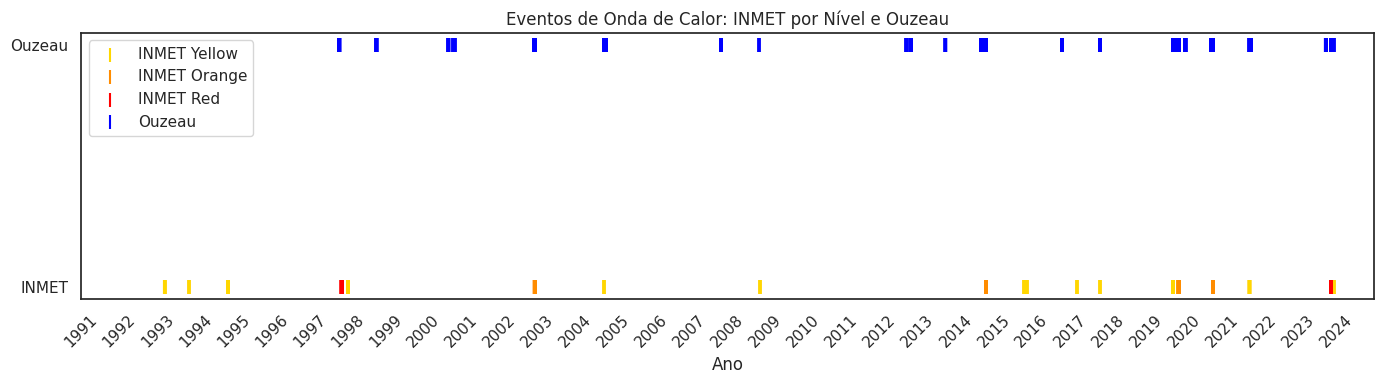

In [25]:
# Estilo mais limpo do seaborn (sem grid)
sns.set_style("white")

# Garante que o índice seja datetime e filtra o período desejado
df = df.loc['1991-01-01':'2024-12-31']
df.index = pd.to_datetime(df.index)

# Cria a figura
plt.figure(figsize=(14, 4))

# Define cores (exemplo; substitua pelo seu mapeamento real)
color_mapping = {'Yellow': 'gold', 'Orange': 'darkorange', 'Red': 'red'}

# Plota os alertas do INMET
for level, color in color_mapping.items():
    event_times = df.index[df['INMET Alert'] == level]
    plt.scatter(event_times, [1] * len(event_times), color=color, marker='|', s=100,
                label=f'INMET {level}')

# Plota os eventos Ouzeau (em y=2)
ouzeau_event_times = df.index[df['ouzeau_detected'] == 1]
plt.scatter(ouzeau_event_times, [2] * len(ouzeau_event_times), color='blue', marker='|', s=100,
            label='Ouzeau')

# Ajuste dos eixos
plt.yticks([1, 2], ['INMET', 'Ouzeau'])
plt.xlabel('Ano')
plt.title('Eventos de Onda de Calor: INMET por Nível e Ouzeau')

# Limites do eixo x
plt.xlim(pd.Timestamp('1991-01-01'), pd.Timestamp('2024-12-31'))

# Formata o eixo x para mostrar apenas os anos
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

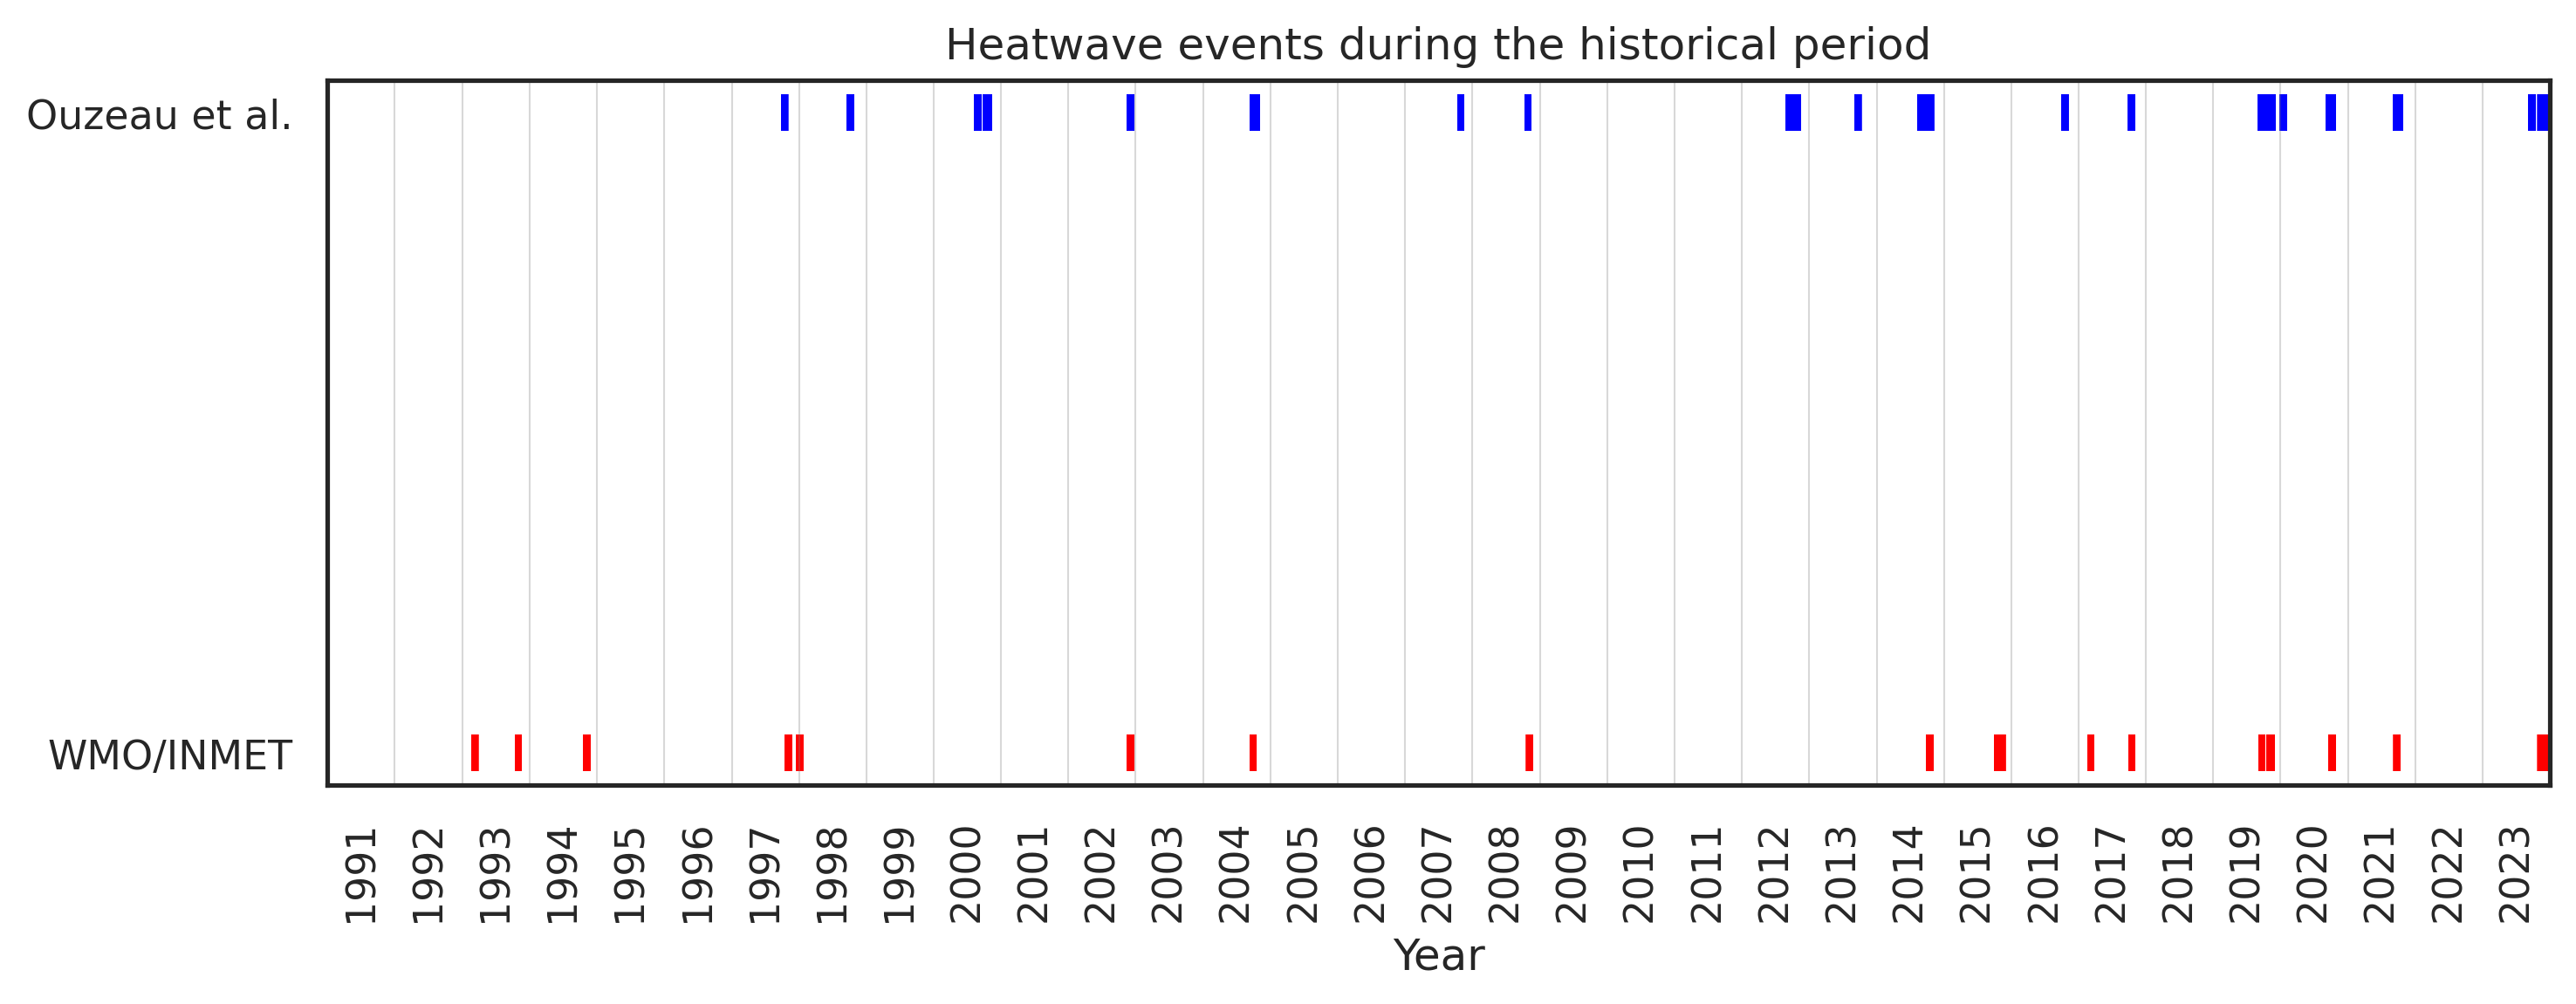

In [81]:
# Estilo limpo do seaborn
sns.set_style("white")

# Garante que o índice seja datetime e filtra o período
df = df.loc['1991-01-01':'2024-12-31']
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(10, 4), dpi=300)

# Define cores dos alertas
color_mapping = {'Yellow': 'red', 'Orange': 'red', 'Red': 'red'}

# Plota os alertas INMET
for level, color in color_mapping.items():
    event_times = df.index[df['INMET Alert'] == level]
    plt.scatter(event_times, [1] * len(event_times), color=color, marker='|', s=100,
                label=f'WMO/INMET {level}')

# Plota os eventos Ouzeau
ouzeau_event_times = df.index[df['ouzeau_detected'] == 1]
plt.scatter(ouzeau_event_times, [2] * len(ouzeau_event_times), color='blue', marker='|', s=100,
            label='Ouzeau')

# Adiciona linhas verticais leves a cada início de ano
for year in pd.date_range('1991', '2025', freq='YS'):
    plt.axvline(x=year, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Ajustes dos eixos e visual
plt.yticks([1, 2], ['WMO/INMET', 'Ouzeau et al.'])
plt.xlabel('Year')
plt.title('Heatwave events during the historical period')

# Limites e formatação do eixo x
plt.xlim(pd.Timestamp('1991-01-01'), pd.Timestamp('2023-12-31'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=7))  # Julho = meio do ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

#plt.legend()
plt.tight_layout()
plt.show()

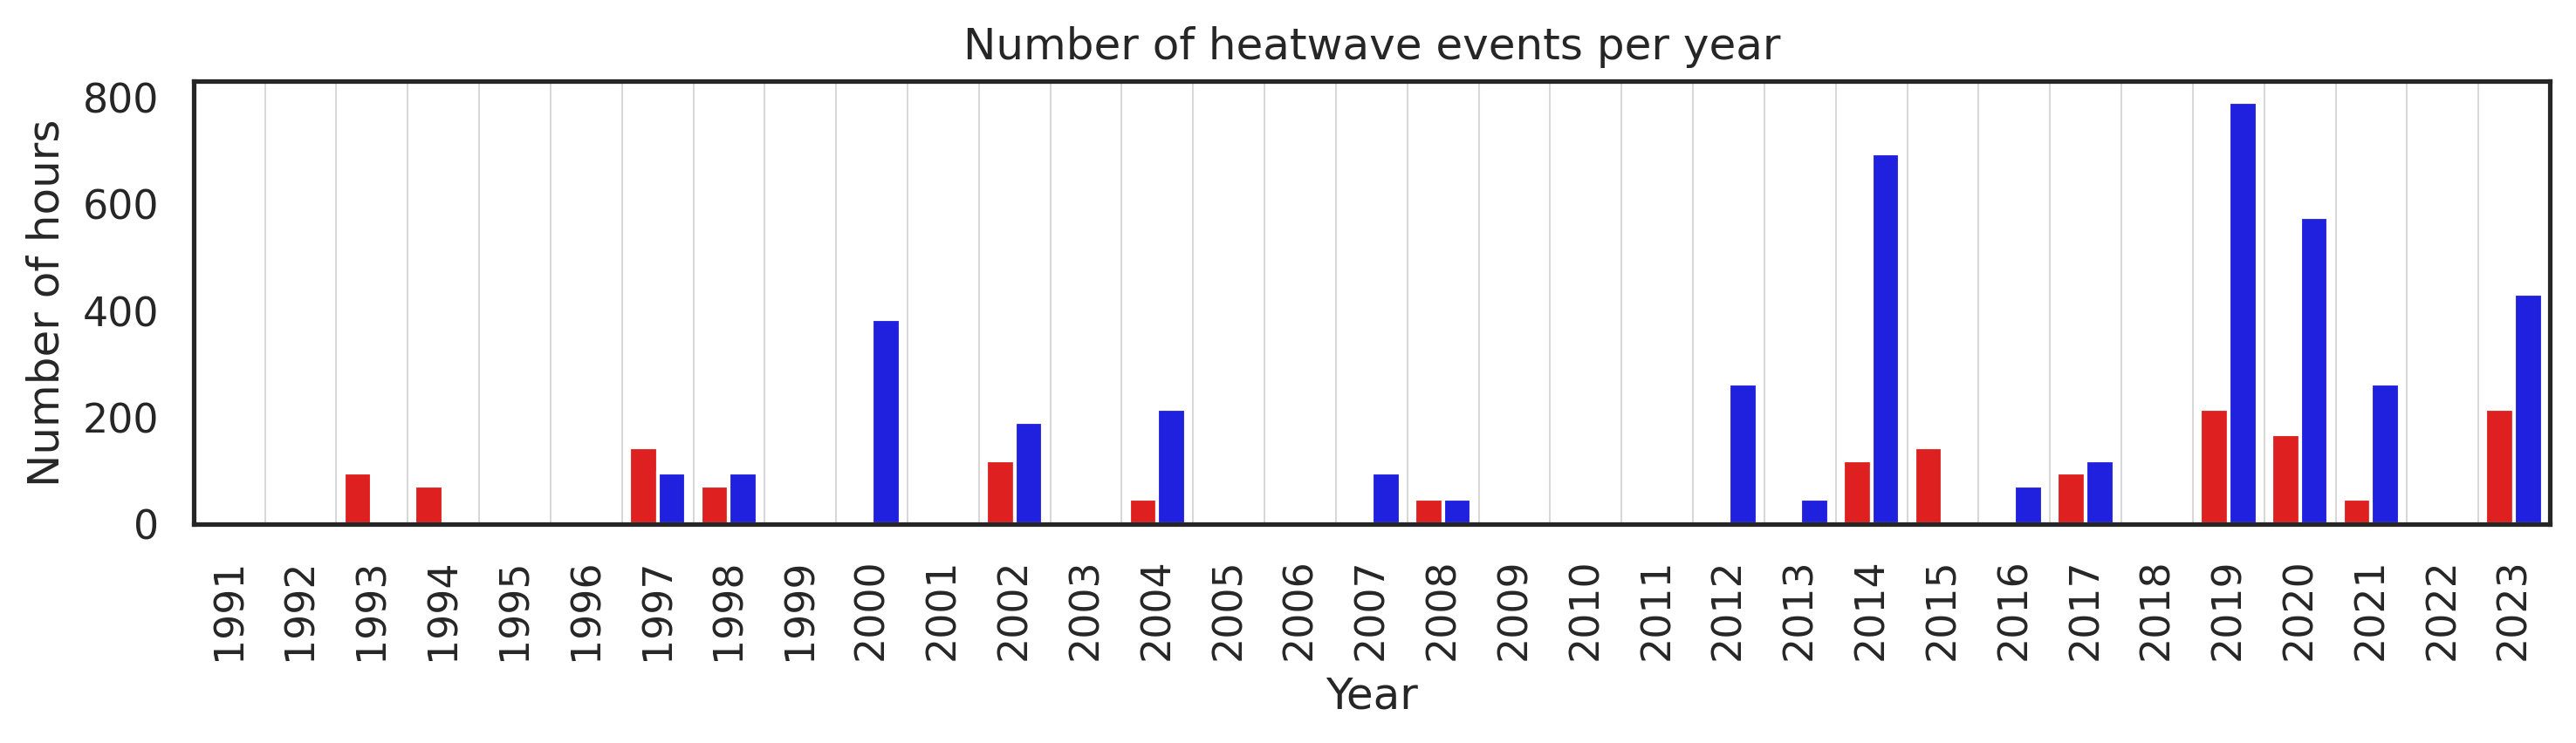

In [82]:
# Garante datetime e extrai ano
df.index = pd.to_datetime(df.index)
df['year'] = df.index.year

# Define anos de interesse
years = pd.Index(range(1991, 2024), name='year')

# Contagens reindexadas
inmet_counts = (
    df[df['INMET Alert'].notna()]
    .groupby('year').size()
    .reindex(years, fill_value=0)
    .rename('WMO/INMET')
)
ouzeau_counts = (
    df[df['ouzeau_detected'] == 1]
    .groupby('year').size()
    .reindex(years, fill_value=0)
    .rename('Ouzeau et al.')
)

# Junta e derrete
event_counts = pd.concat([inmet_counts, ouzeau_counts], axis=1).reset_index()
event_counts_long = event_counts.melt(id_vars='year', var_name='Method', value_name='Event Count')

# Cores personalizadas
palette = {
    'WMO/INMET': 'red',
    'Ouzeau et al.': 'blue'
}

# Plot
plt.figure(figsize=(10, 3), dpi=300)
ax = sns.barplot(data=event_counts_long, x='year', y='Event Count', hue='Method', palette=palette)

# Adiciona linhas verticais leves entre os anos
for i, year in enumerate(event_counts['year']):
    ax.axvline(x=i - 0.5, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Remove rótulo do eixo Y e oculta legenda
ax.set_ylabel("Number of hours")         # Remove o texto do eixo Y
ax.get_legend().remove()  # Remove a legenda

# Eixo e legenda
plt.title('Number of heatwave events per year')
plt.xlabel('Year')
plt.ylabel('Number of hours')
plt.xticks(rotation=90)
#plt.legend()
plt.tight_layout()
plt.show()



In [19]:
# Filtra a série para o período desejado
df = df.loc['1991-01-01':'2024-12-31']

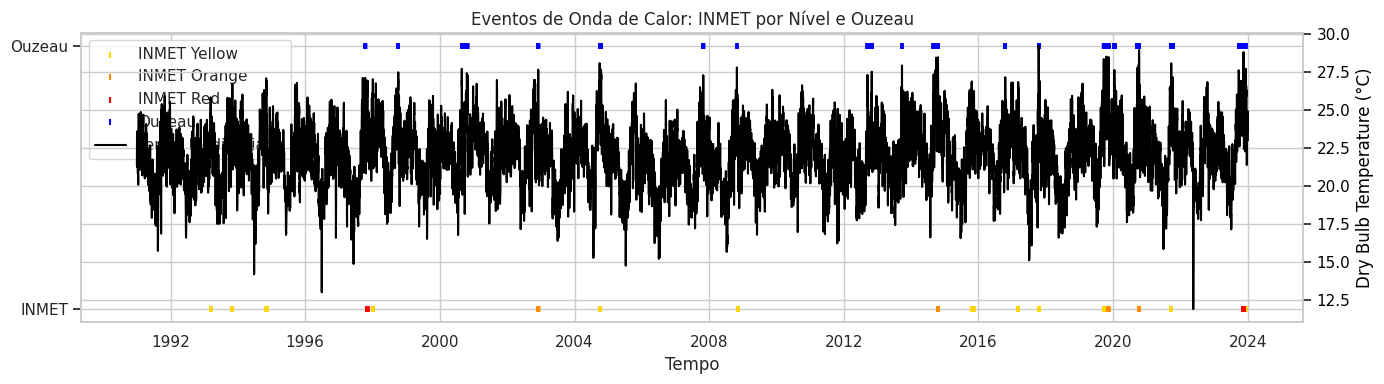

In [20]:
# Cálculo da temperatura média diária usando a coluna "Dry Bulb Temperature"
daily_temp = df['Dry Bulb Temperature'].resample('D').mean()

# Criação do gráfico
plt.figure(figsize=(14, 4))

# Primeiro, plota os eventos dos métodos INMET e Ouzeau num eixo original
ax1 = plt.gca()

# Plot dos eventos do INMET agrupados por nível de alerta
for level, color in color_mapping.items():
    # Seleciona os instantes em que o alerta é exatamente aquele nível
    event_times = df.index[df['INMET Alert'] == level]
    ax1.scatter(event_times, [1] * len(event_times), color=color, marker='|', s=20,
                label=f'INMET {level}')

# Plot dos eventos do método Ouzeau (colocados na posição y=2)
ouzeau_event_times = df.index[df['ouzeau_detected'] == 1]
ax1.scatter(ouzeau_event_times, [2] * len(ouzeau_event_times), color='blue', marker='|', s=20,
            label='Ouzeau')

# Configurações do eixo y do ax1 para os eventos
ax1.set_yticks([1, 2])
ax1.set_yticklabels(['INMET', 'Ouzeau'])
ax1.set_xlabel('Tempo')
ax1.set_title('Eventos de Onda de Calor: INMET por Nível e Ouzeau')

# Agora, adiciona um segundo eixo y para a temperatura média diária
ax2 = ax1.twinx()
ax2.plot(daily_temp.index, daily_temp, color='black', label='Temp. Média Diária', linewidth=1.5)
ax2.set_ylabel('Dry Bulb Temperature (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine as legendas de ambos os eixos
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()